In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Série temporal de exemplo
tempo = np.linspace(0, 5, 1000)
sinal = np.sin(2 * np.pi * tempo) + 0.5 * np.sin(4 * np.pi * tempo)  # Sinal com duas componentes de frequência

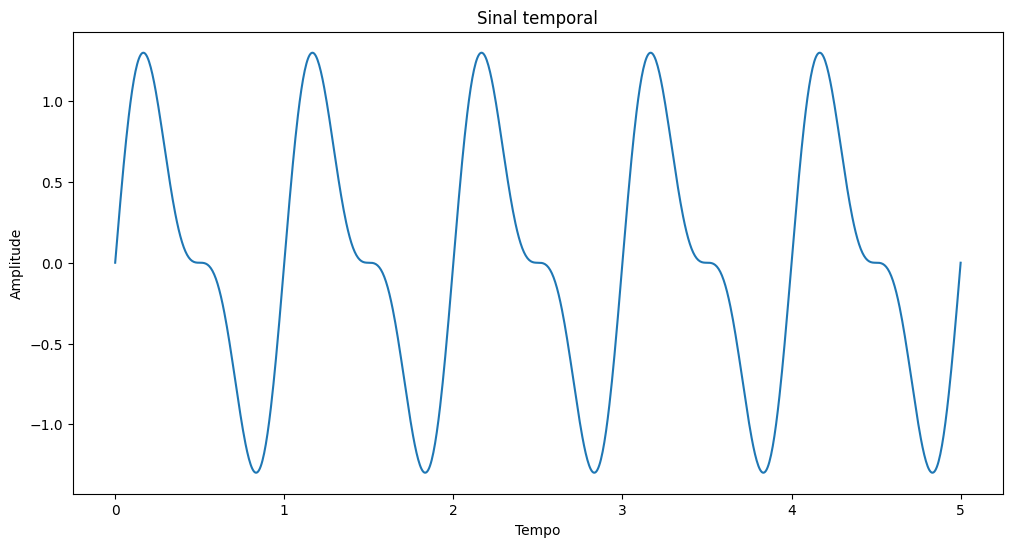

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinal temporal')
plt.show()

In [4]:
def plot_FourierFreqs(timeseries, xlimits=None):
    fft = np.fft.fft(timeseries)
    frequencies = np.fft.fftfreq(len(timeseries))
    # Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
    fft[frequencies < 0] = 0
    
    # Plotar o espectro de frequências
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, np.abs(fft))
    plt.xlabel('Frequência')
    plt.ylabel('Amplitude')
    plt.title('Espectro de frequências')
    plt.xlim(xlimits)
    plt.grid(True)
    plt.show()

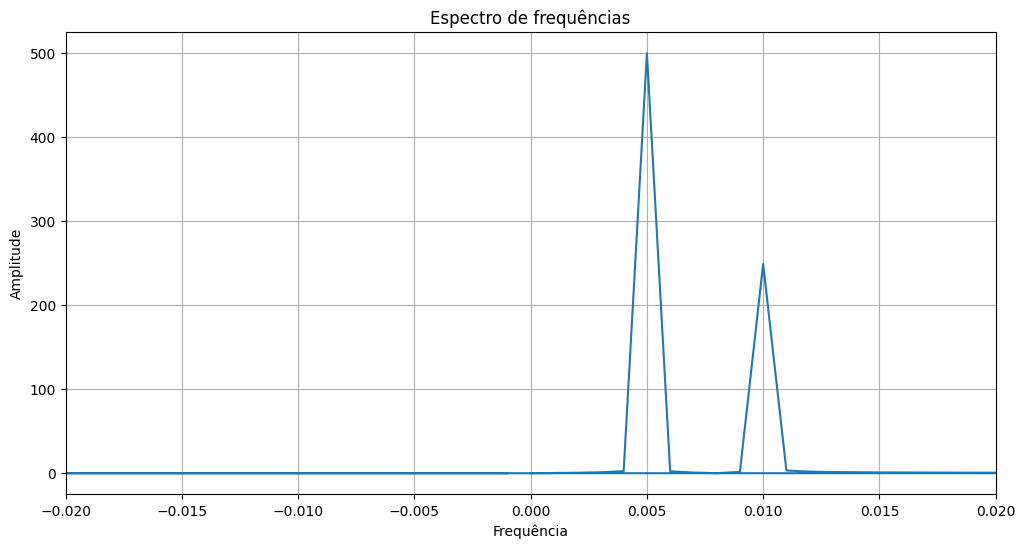

In [5]:
plot_FourierFreqs(sinal, xlimits=[-0.02, 0.02])

## Importando dados do IMEA de Sorriso-MT

In [6]:
soja_sorriso = pd.read_excel(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx')

soja_sorriso

,Cidade,Data,Valor,Unidade
0,Sorriso,2021-01-11,151.193366,Reais por saca
1,Sorriso,2021-01-12,152.695531,Reais por saca
2,Sorriso,2021-01-13,148.774896,Reais por saca
3,Sorriso,2021-01-14,148.430713,Reais por saca
4,Sorriso,2021-01-15,149.769147,Reais por saca
...,...,...,...,...
873,Sorriso,2024-08-29,104.620890,Reais por saca
874,Sorriso,2024-08-30,104.689364,Reais por saca
875,Sorriso,2024-09-02,104.689364,Reais por saca
876,Sorriso,2024-09-03,106.996243,Reais por saca


In [7]:
soja_sorriso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Cidade   878 non-null    object        
 1   Data     878 non-null    datetime64[ns]
 2   Valor    878 non-null    float64       
 3   Unidade  878 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 27.6+ KB


In [8]:
soja_sorriso.set_index(soja_sorriso['Data'], drop=False, inplace=True)
soja_sorriso.drop(columns=['Data', 'Cidade', 'Unidade'], inplace=True)
soja_sorriso.rename({'Valor': 'Preco'}, axis=1, inplace=True)

soja_sorriso.head()

,Preco
Data,
2021-01-11,151.193366
2021-01-12,152.695531
2021-01-13,148.774896
2021-01-14,148.430713
2021-01-15,149.769147


In [9]:
# Calcular a Transformada de Fourier
n = len(soja_sorriso['Preco'])
z = np.fft.fft(soja_sorriso['Preco'])
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_sorriso_fourier = np.angle(w)

fase_acm = np.unwrap(fase_sorriso_fourier)

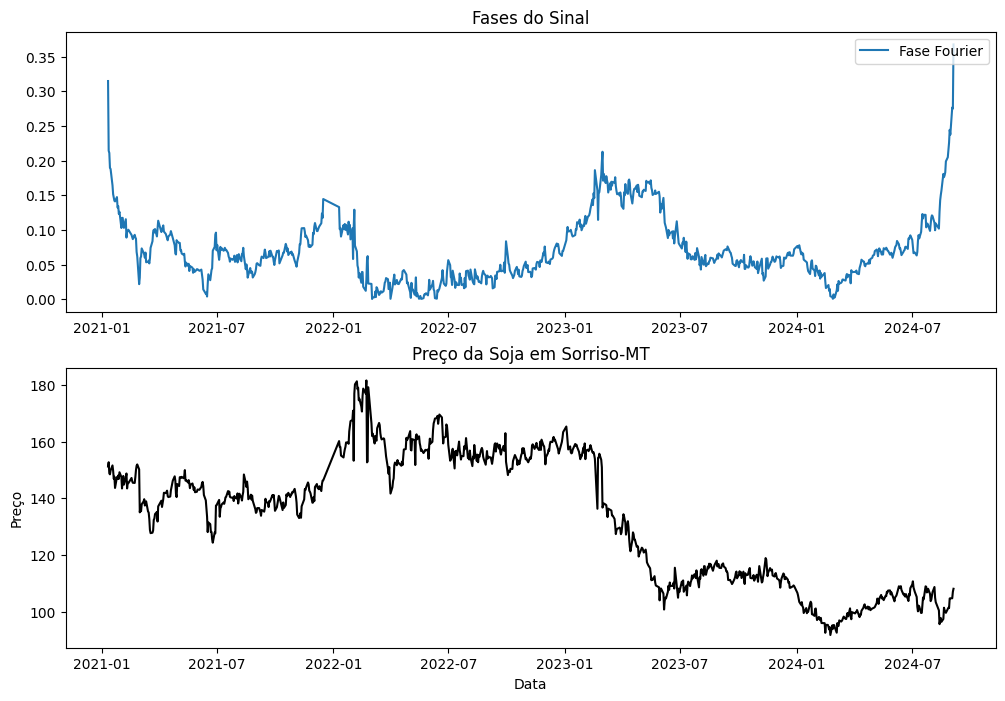

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(soja_sorriso.index, np.abs(fase_sorriso_fourier), label='Fase Fourier')
plt.title('Fases do Sinal')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(soja_sorriso, color='black')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço da Soja em Sorriso-MT')

plt.show()

### Teste com uma senóide


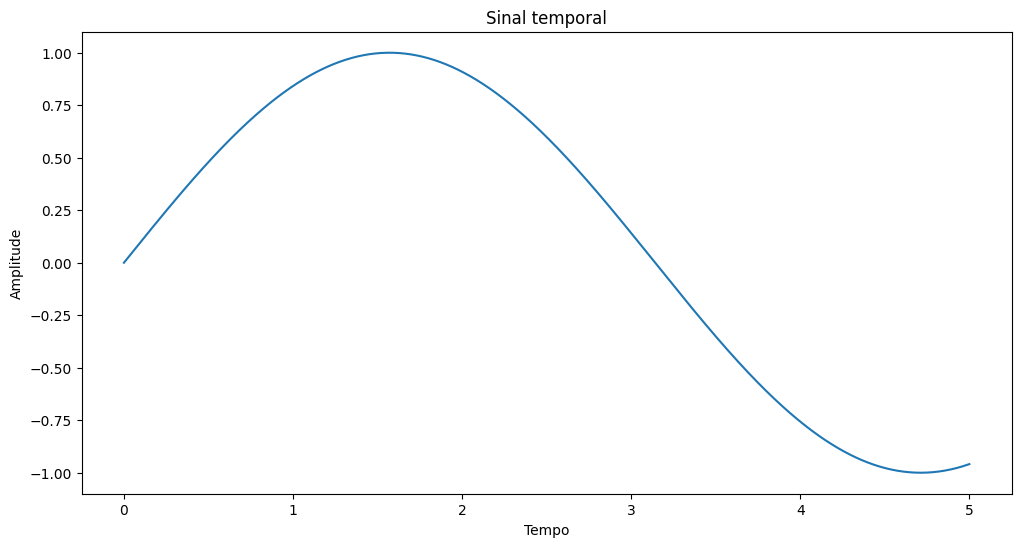

In [11]:
tempo = np.linspace(0, 5, 1000)
sinal = np.sin(tempo)

plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinal temporal')
plt.show()

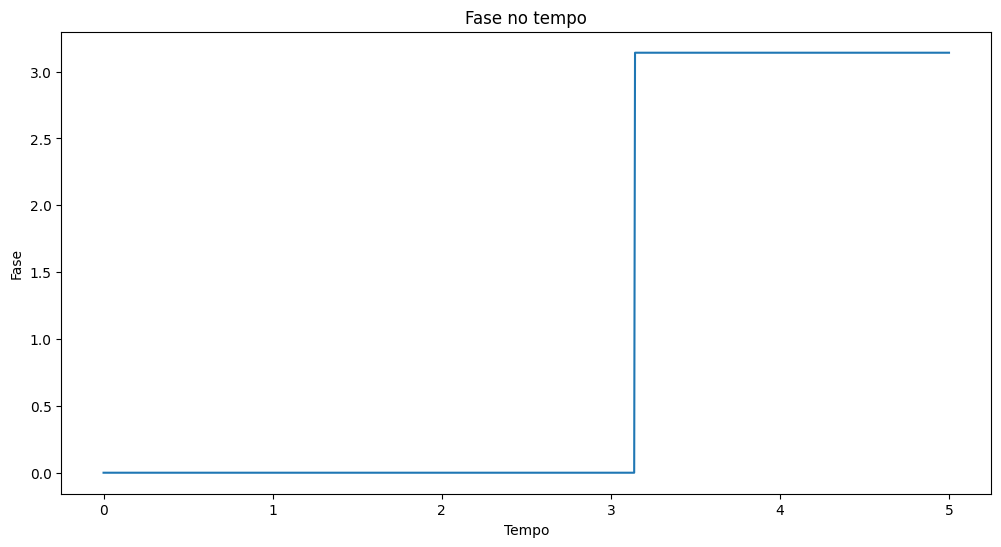

In [12]:
fase = np.angle(sinal)

plt.figure(figsize=(12, 6))
plt.plot(tempo, fase)
plt.xlabel('Tempo')
plt.ylabel('Fase')
plt.title('Fase no tempo')
plt.show()


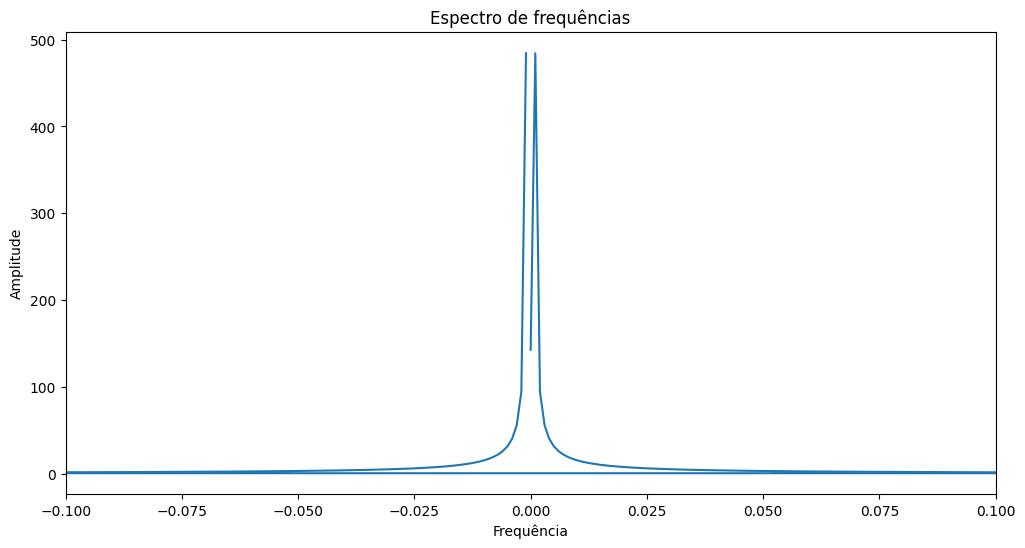

In [13]:
frequencies = np.fft.fftfreq(len(sinal))
fft = np.fft.fft(sinal)

# Plotar o espectro de frequências
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft))
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.title('Espectro de frequências')
plt.xlim([-0.1, 0.1])
plt.show()

In [14]:
# Calcular a Transformada de Fourier
n = len(sinal)
z = np.fft.fft(sinal)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_fourier = np.angle(w)

fase_acm = np.unwrap(fase_fourier)

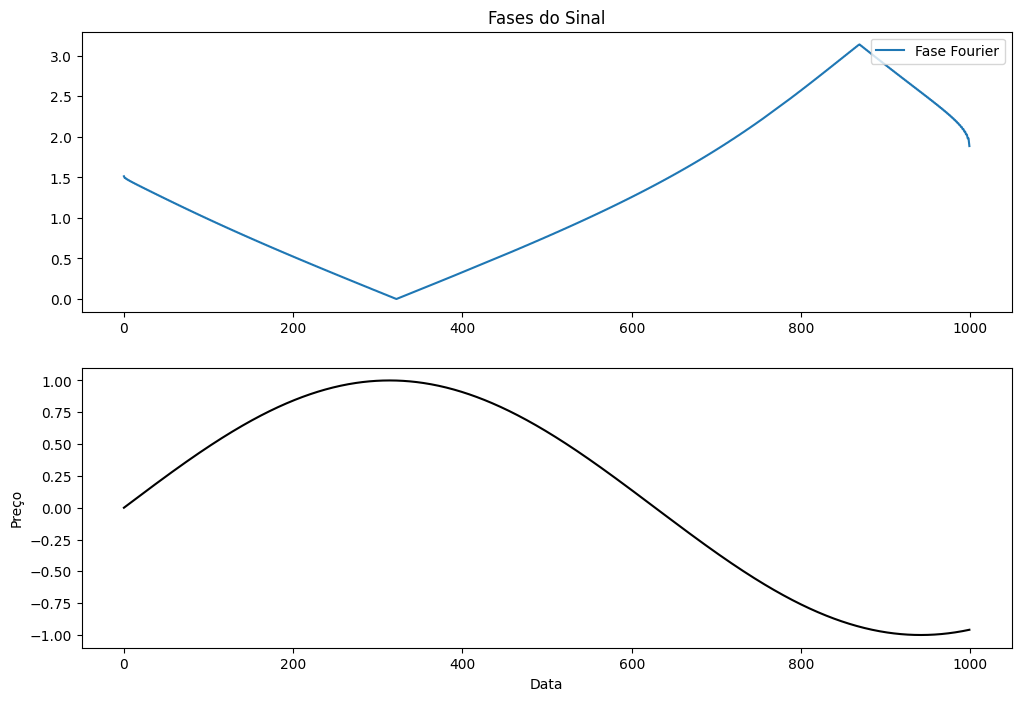

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.abs(fase_fourier), label='Fase Fourier')
plt.title('Fases do Sinal')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(sinal, color='black')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('')

plt.show()

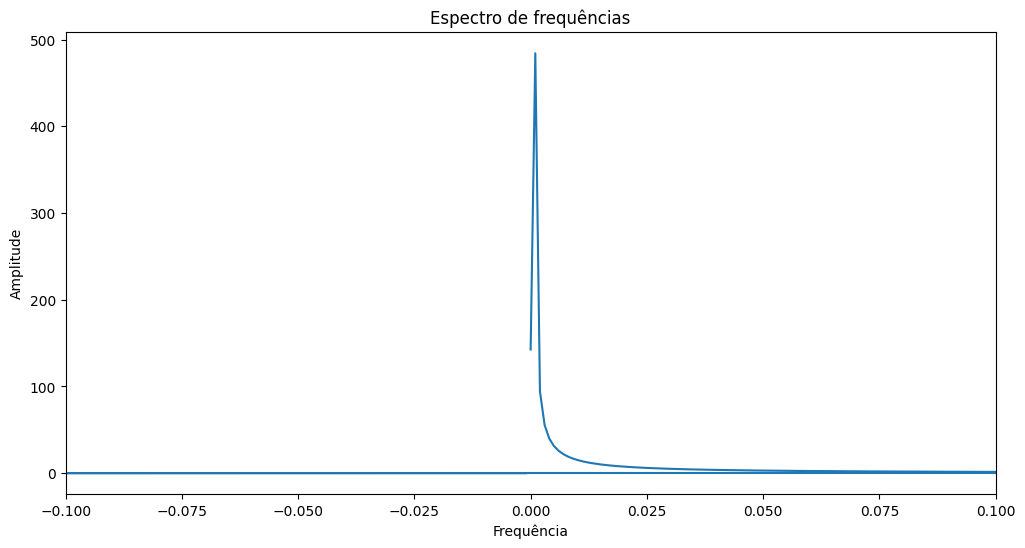

In [16]:
# Plotar o espectro de frequências
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(z))
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.title('Espectro de frequências')
plt.xlim([-0.1, 0.1])
plt.show()

### Função

In [17]:
def plot_FourierTranform(timeseries, freqEspectrum=True, phaseUnwrapped=True, xlimitsEspectrum=None):

    # Calcular a Transformada de Fourier
    n = len(timeseries)
    z = np.fft.fft(timeseries)
    freq = np.fft.fftfreq(n)

    # Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
    z[freq < 0] = 0

    # Calcular a Transformada Inversa de Fourier (para voltar ao domínio do tempo)
    w = np.fft.ifft(z)

    phase_fourier = np.angle(w)

    unwrapped_phase = np.unwrap(phase_fourier)

    subplots = 2
    if freqEspectrum == True:
        subplots += 1
    if phaseUnwrapped == True:
        subplots += 1

    #plotagem
    plt.figure(figsize=(12, 8))

    plt.subplot(subplots, 1, 1)
    plt.plot(timeseries.index, np.abs(phase_fourier), label='Fase Fourier')
    plt.title('Fases do Sinal')

    plt.subplot(subplots, 1, 2)
    plt.plot(timeseries.index, timeseries, color='black')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.title('Série Temporal')

    if freqEspectrum == True:
        plt.subplot(subplots, 1, 3)   #necessário ainda corrigir esse posicionamento do subplot
        plt.plot(freq, np.abs(z), color='red')
        plt.xlabel('Frequência')
        plt.ylabel('Amplitude')
        plt.xlim(xlimitsEspectrum)
        plt.title('Espectro de frequências')

    if phaseUnwrapped == True:
        plt.subplot(subplots, 1, 4)  #necessário se a fase original apresenta saltos superiores a 2pi
        plt.plot(timeseries.index, np.abs(unwrapped_phase))
        plt.title('Fase desenrolada')

    plt.tight_layout()
    plt.show()

    

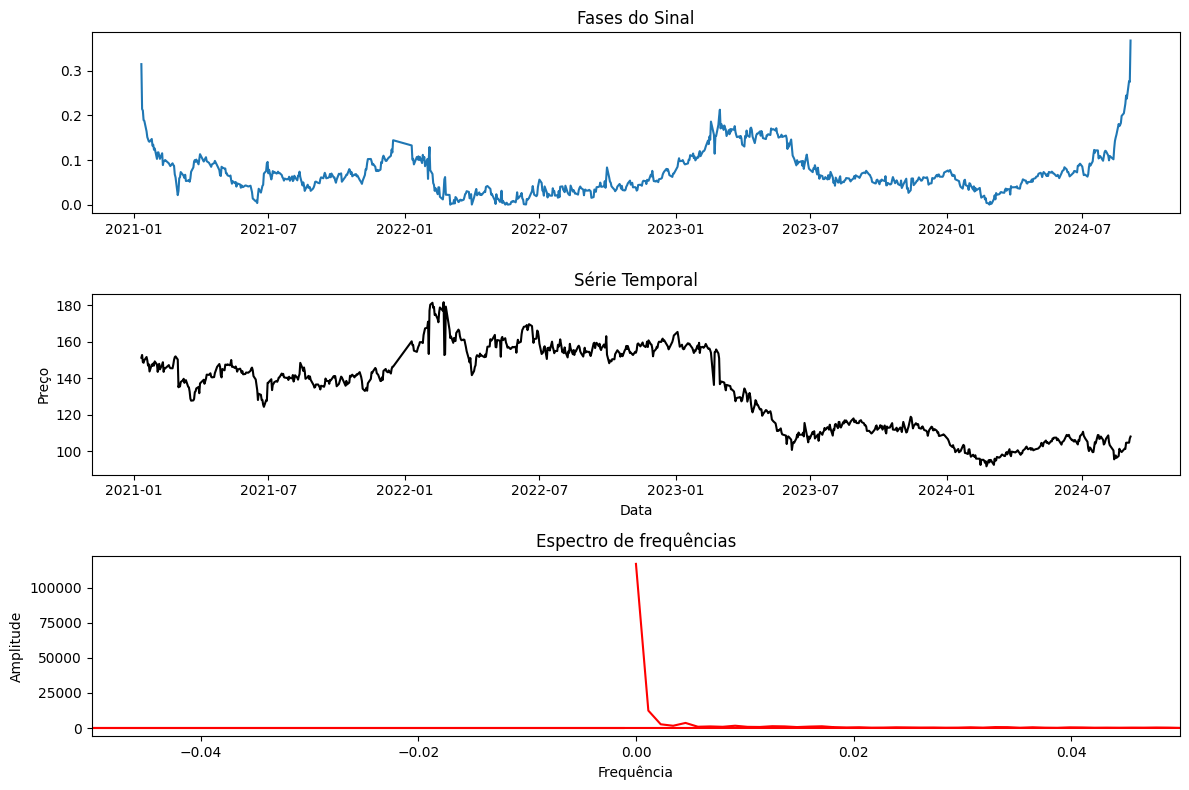

In [18]:
plot_FourierTranform(soja_sorriso['Preco'], xlimitsEspectrum=[-0.05, 0.05], phaseUnwrapped=False)

# Espectro de frequências (17/10/2024), anotações na agenda

In [19]:
# Série temporal de exemplo
tempo = np.linspace(0, 8, 8)
sinal = np.sin(2 * np.pi * 1000 * tempo) + 0.5 * np.sin(2 * np.pi * 2000 * tempo + (3*np.pi/4))  
# Sinal com duas componentes de frequência, a segunda defasada em 3pi/4
# Amplitudes 1 e 0.5
# 8 segundos
# Taxa de amostragem = 8

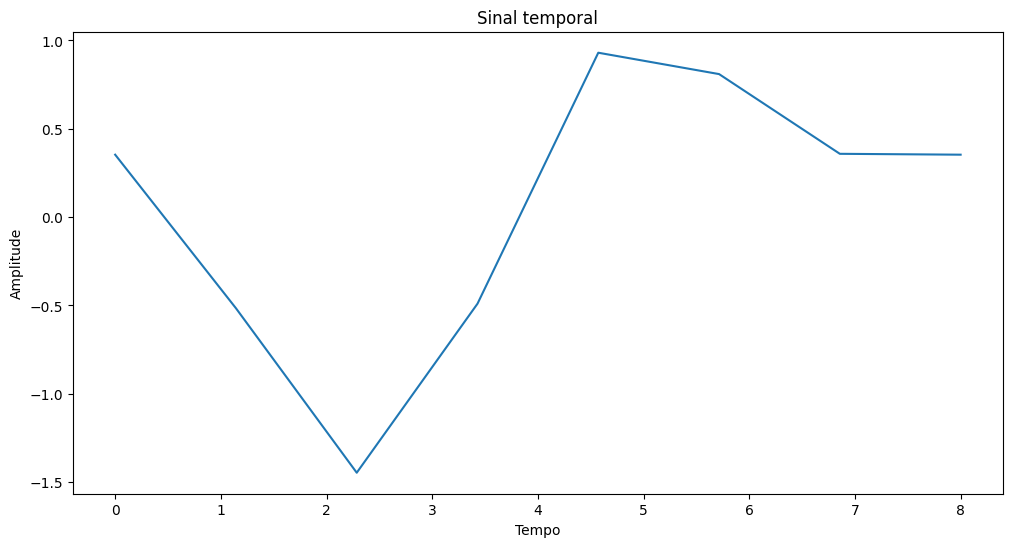

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinal temporal')
plt.show()

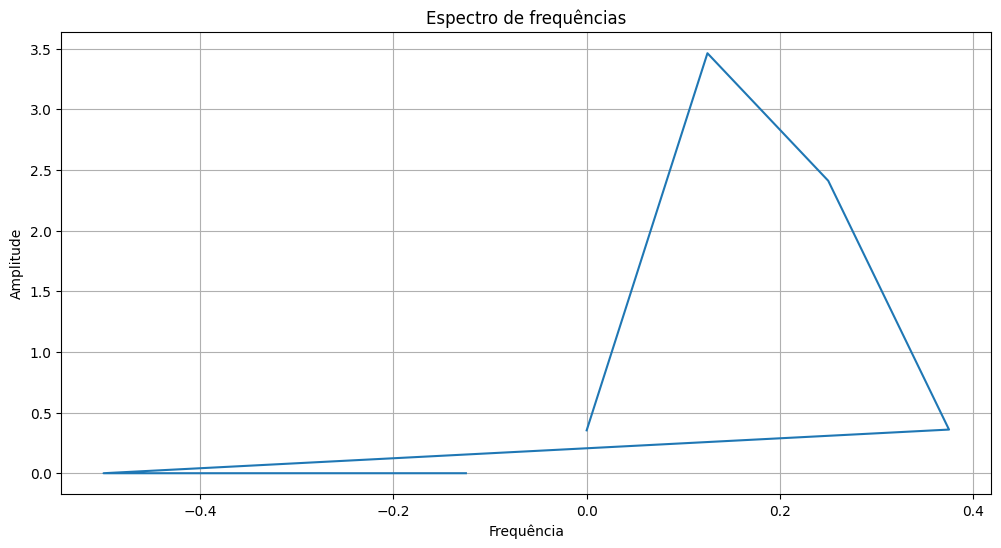

In [21]:
plot_FourierFreqs(sinal)

In [22]:
def plot_FourierFases(timeseries, tempo, Xfreq=True, Xtempo=False, unwrap=False):
    fase = np.angle(timeseries)
    fase_acm = np.unwrap(fase)

    if Xfreq:
        frequencies = np.fft.fftfreq(len(timeseries))
        plt.figure(figsize=(12, 6))
        if unwrap:
            plt.plot(frequencies, fase_acm)
        else:
            plt.plot(frequencies, fase)
        plt.xlabel('Frequência')
        plt.ylabel('Fase')
        plt.title('Fase na frequência')
        plt.grid(True)
        plt.show()

    if Xtempo:
        plt.figure(figsize=(12, 6))
        if unwrap:
            plt.plot(tempo, fase_acm)
        else:
            plt.plot(tempo, fase)
        plt.xlabel('Tempo')
        plt.ylabel('Fase')
        plt.title('Fase no tempo')
        plt.grid(True)
        plt.show()

    return None

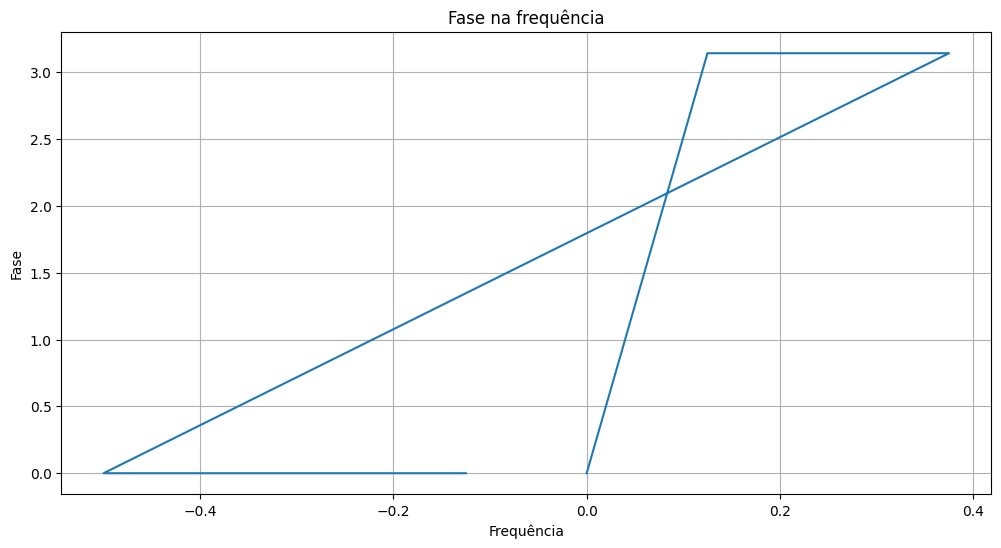

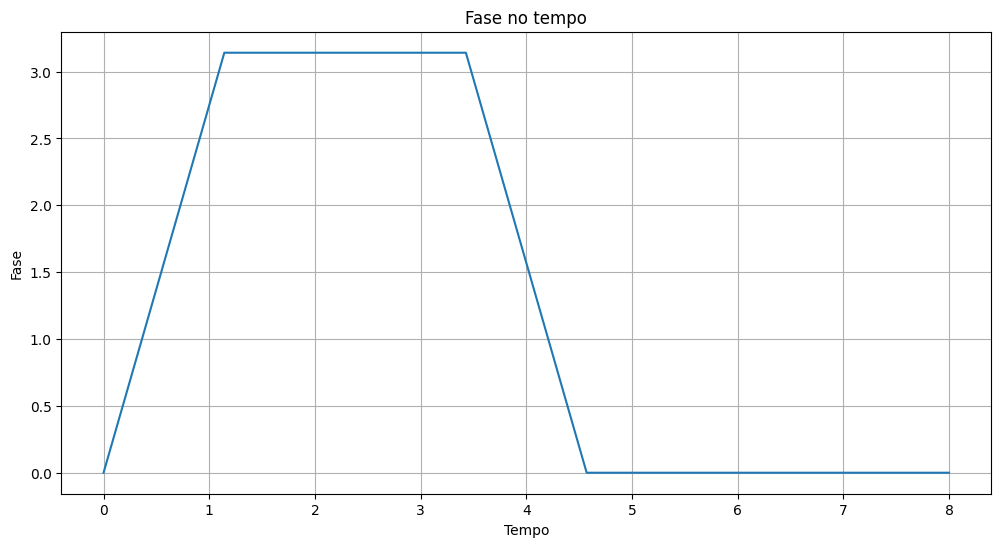

In [23]:
plot_FourierFases(sinal, tempo, Xfreq=True, Xtempo=True)

# Aplicando a uma série de retornos

In [24]:
soja_sorriso['Retornos'] = soja_sorriso['Preco'].pct_change()
soja_sorriso.dropna(subset=['Retornos'], inplace=True)
soja_sorriso.head(2)

,Preco,Retornos
Data,,
2021-01-12,152.695531,0.009935
2021-01-13,148.774896,-0.025676


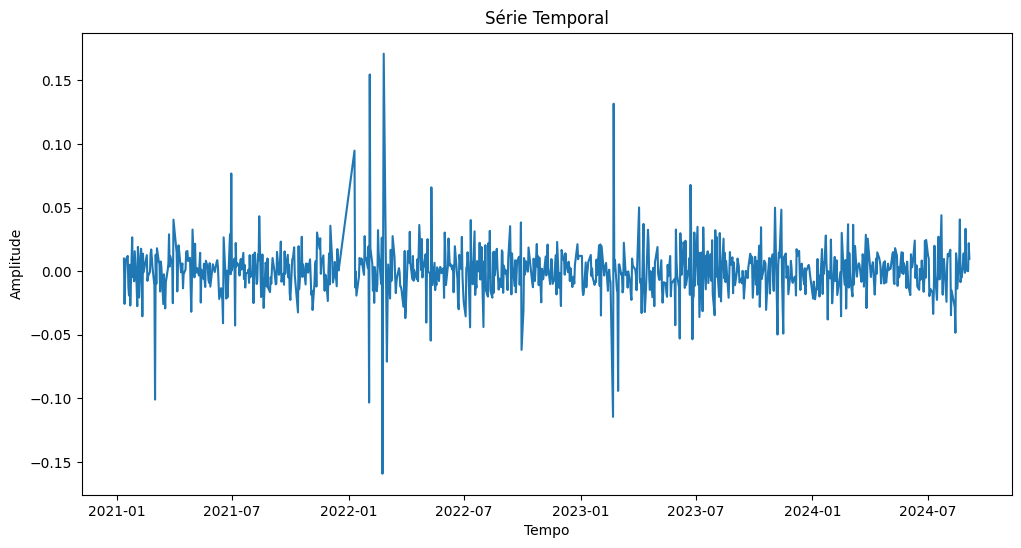

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(soja_sorriso.index, soja_sorriso['Retornos'])
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Série Temporal')
plt.show()

In [26]:
tx_amostragem = len(soja_sorriso['Retornos'])
tx_amostragem

877

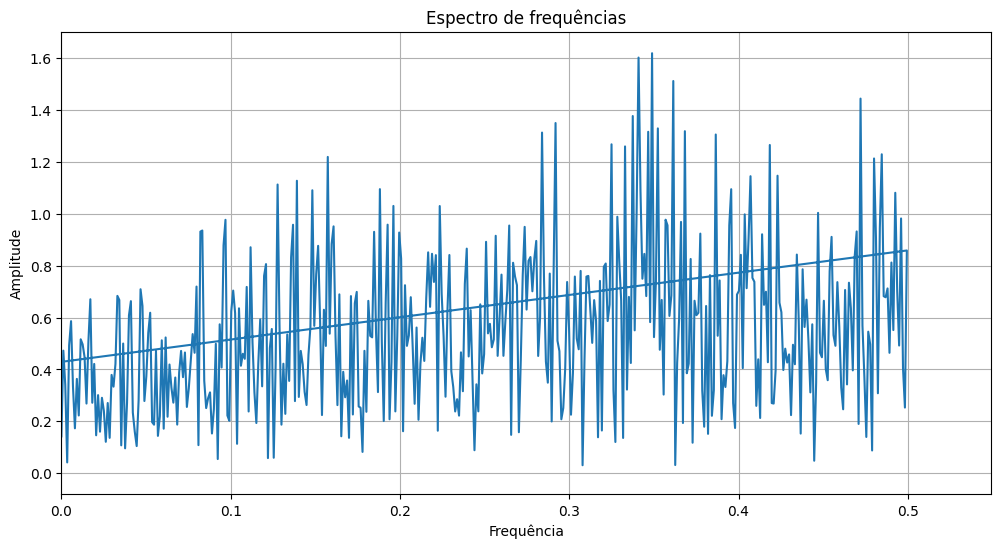

In [27]:
plot_FourierFreqs(soja_sorriso['Retornos'], xlimits=[0, None])

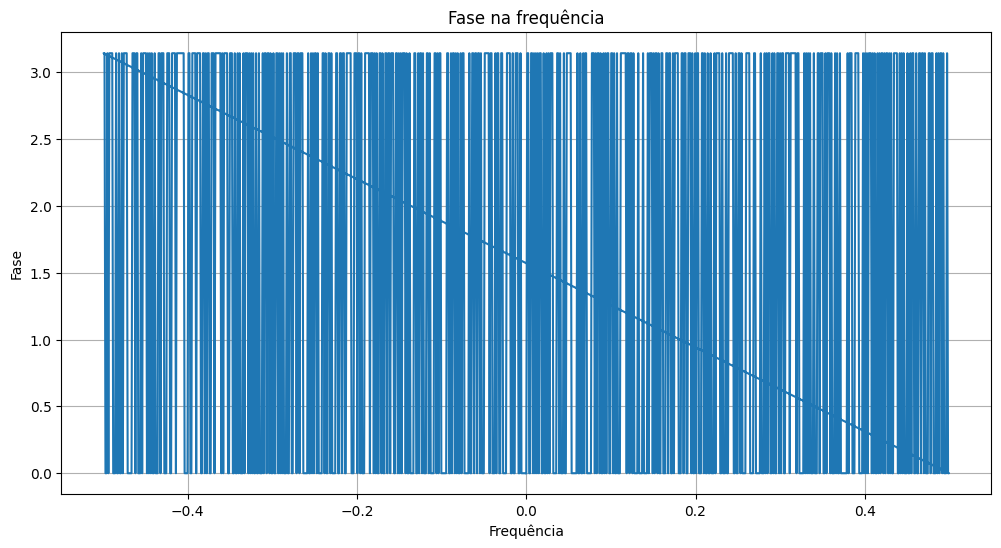

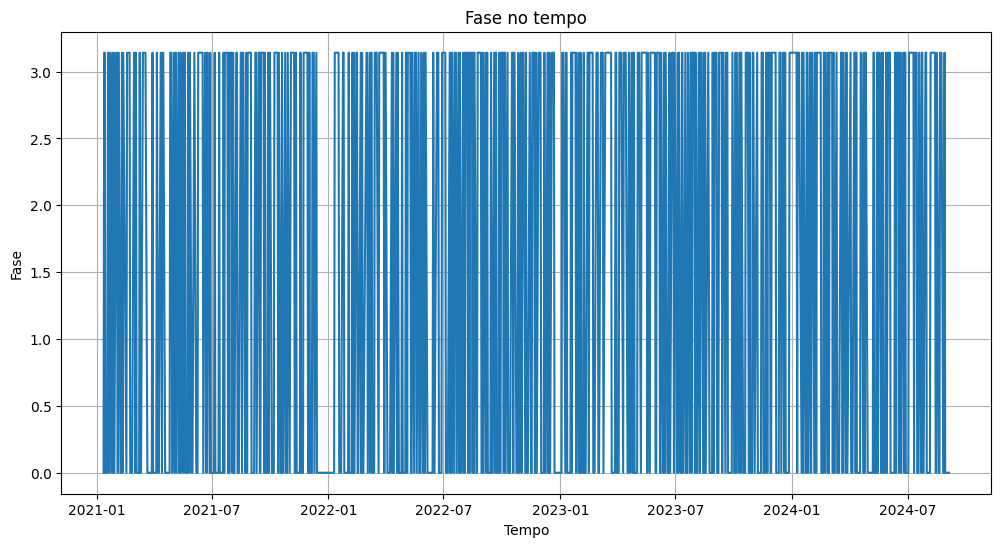

In [29]:
plot_FourierFases(soja_sorriso['Retornos'], soja_sorriso.index, unwrap=True, Xtempo=True)